In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

In [23]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

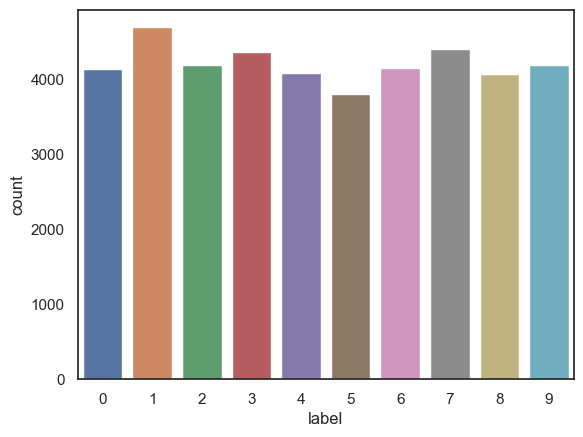

In [24]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [26]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [27]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [28]:
X_train = X_train / 255.0
test = test / 255.0

In [30]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [31]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [32]:
# Set the random seed
random_seed = 2

In [33]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

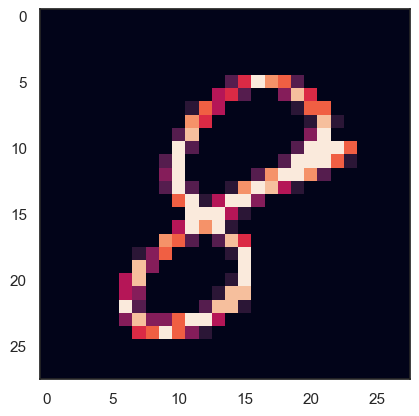

In [34]:
g = plt.imshow(X_train[0][:,:,0])

CNN

In [35]:
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)         

In [37]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [38]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [39]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [42]:
epochs = 30
batch_size=86

In [43]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs,validation_data = (X_val, Y_val), verbose = 2)

Epoch 1/30
440/440 - 57s - loss: 0.0719 - accuracy: 0.9781 - val_loss: 0.0413 - val_accuracy: 0.9860
Epoch 2/30
440/440 - 59s - loss: 0.0538 - accuracy: 0.9843 - val_loss: 0.0363 - val_accuracy: 0.9888
Epoch 3/30
440/440 - 57s - loss: 0.0471 - accuracy: 0.9863 - val_loss: 0.0315 - val_accuracy: 0.9914
Epoch 4/30
440/440 - 57s - loss: 0.0379 - accuracy: 0.9889 - val_loss: 0.0322 - val_accuracy: 0.9910
Epoch 5/30
440/440 - 58s - loss: 0.0361 - accuracy: 0.9893 - val_loss: 0.0530 - val_accuracy: 0.9867
Epoch 6/30
440/440 - 57s - loss: 0.0327 - accuracy: 0.9901 - val_loss: 0.0358 - val_accuracy: 0.9912
Epoch 7/30
440/440 - 57s - loss: 0.0310 - accuracy: 0.9907 - val_loss: 0.0323 - val_accuracy: 0.9910
Epoch 8/30
440/440 - 57s - loss: 0.0280 - accuracy: 0.9919 - val_loss: 0.0389 - val_accuracy: 0.9890
Epoch 9/30
440/440 - 57s - loss: 0.0270 - accuracy: 0.9922 - val_loss: 0.0305 - val_accuracy: 0.9912
Epoch 10/30
440/440 - 57s - loss: 0.0258 - accuracy: 0.9921 - val_loss: 0.0275 - val_accura

KeyboardInterrupt: 

Data augmentation

In [44]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [46]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
439/439 - 63s - loss: 0.1598 - accuracy: 0.9588 - val_loss: 0.0494 - val_accuracy: 0.9871
Epoch 2/30
439/439 - 60s - loss: 0.1203 - accuracy: 0.9698 - val_loss: 0.0330 - val_accuracy: 0.9924
Epoch 3/30
439/439 - 61s - loss: 0.1026 - accuracy: 0.9722 - val_loss: 0.0299 - val_accuracy: 0.9914
Epoch 4/30
439/439 - 60s - loss: 0.0972 - accuracy: 0.9746 - val_loss: 0.0237 - val_accuracy: 0.9929
Epoch 5/30
439/439 - 60s - loss: 0.0963 - accuracy: 0.9761 - val_loss: 0.0345 - val_accuracy: 0.9921
Epoch 6/30
439/439 - 60s - loss: 0.0939 - accuracy: 0.9763 - val_loss: 0.0540 - val_accuracy: 0.9886
Epoch 7/30
439/439 - 61s - loss: 0.0944 - accuracy: 0.9766 - val_loss: 0.0267 - val_accuracy: 0.9917
Epoch 8/30
439/439 - 60s - loss: 0.0878 - accuracy: 0.9769 - val_loss: 0.0352 - val_accuracy: 0.9933
Epoch 9/30
439/439 - 60s - loss: 0.0862 - accuracy: 0.9780 - val_loss: 0.0368 - val_accuracy: 0.9907
Epoch 10/30
439/439 - 60s - loss: 0.0906 - accuracy: 0.9777 - val_loss: 0.0420 - val_accura

In [50]:
history

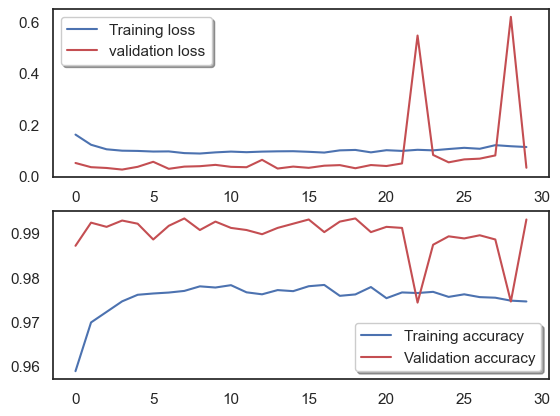

In [52]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

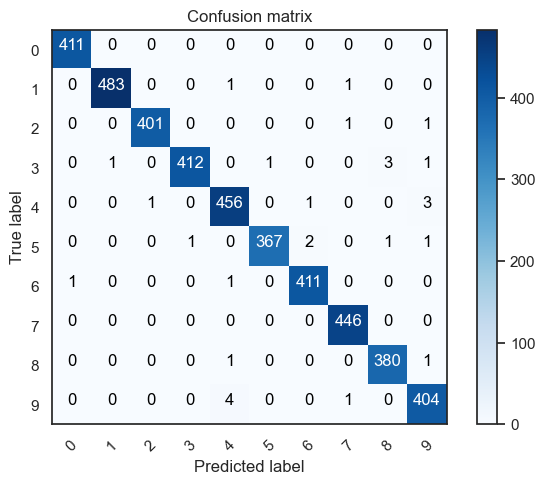

In [53]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

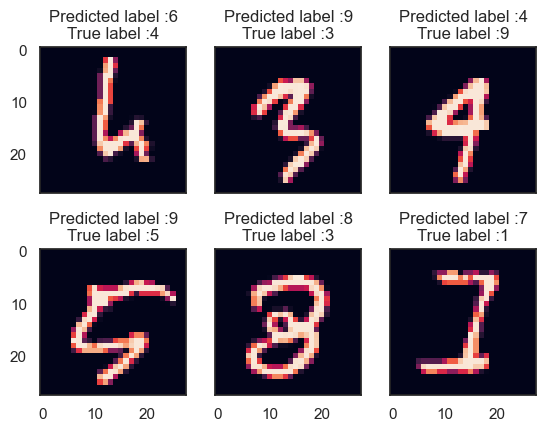

In [54]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [55]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [56]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)